# import Python library, load the credit.csv data, convert Sex, Education, Marriage into dummies, and split the data into a training (70%) and a testing set (30%)

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("c:\\MSC 550\\Lecture\\Week12\\Default2.csv")
SEX = pd.get_dummies(data.SEX)
SEX=SEX.rename(columns = {1: "Male", 2:"Female"}).iloc[:, :-1]
EDUCATION = pd.get_dummies(data.EDUCATION)
EDUCATION=EDUCATION.rename(columns = {1: "Grad", 2:"Uni", 3:"High", 4:"Others"}).iloc[:, :-1]
MARRIAGE = pd.get_dummies(data.MARRIAGE)
MARRIAGE=MARRIAGE.rename(columns = {1: "Married", 2:"Single", 3:"Others"}).iloc[:, :-1]
data = pd.concat([SEX, EDUCATION,MARRIAGE,data], axis=1).drop(['SEX', 'EDUCATION',"MARRIAGE"], axis=1)

data.head()

,Male,Grad,Uni,High,Married,Single,LIMIT_BAL,AGE,PAY_0,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,0,1,0,1,0,20000,24,2,2,...,0,0,0,0,689,0,0,0,0,1
1,0,0,1,0,0,1,120000,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,0,1,0,0,1,90000,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,0,1,0,1,0,50000,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,1,0,1,0,50000,57,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [112]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 0)

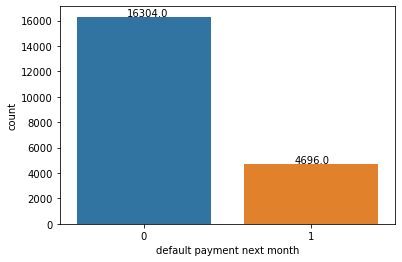

In [68]:
import seaborn as sns
ax = sns.countplot(x=y_train["default payment next month"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

# Fit a logistic regression with Logit function from statsmodels, and predict on the test set

In [113]:
import statsmodels.api as sm
model=sm.Logit(y_train, sm.add_constant(x_train))
lr = model.fit()
print(lr.summary())
p_pred = lr.predict(sm.add_constant(x_test))
y_pred = round(p_pred)

Optimization terminated successfully.
         Current function value: 0.466638
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20973
Method:                                   MLE   Df Model:                           26
Date:                        Wed, 09 Nov 2022   Pseudo R-squ.:                  0.1220
Time:                                16:18:57   Log-Likelihood:                -9799.4
converged:                               True   LL-Null:                       -11160.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3857      0.291     -8.208 

# Model assessment

In [114]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

0.8168888888888889
[[6900  160]
 [1488  452]]


Text(0, 0.5, 'True Positive Rate')

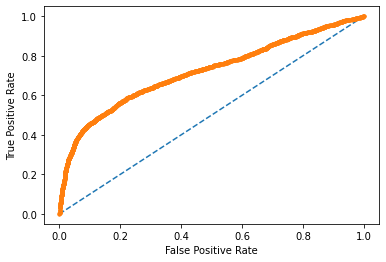

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
mr_probs = [0 for _ in range(len(y_test))]
mr_fpr, mr_tpr, _ = roc_curve(y_test, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, p_pred)
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Model assessment: Recall against Precision

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, f1_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Recall:", tp/(tp+fn))
print("Precision:", tp/(tp+fp))
print("F1 Score:", f1_score(y_test, y_pred))

Recall: 0.2329896907216495
Precision: 0.738562091503268
F1 Score: 0.35423197492163006


AUC for precision-recall curve: 0.5100542024868524
AP score: 0.5103007745782324


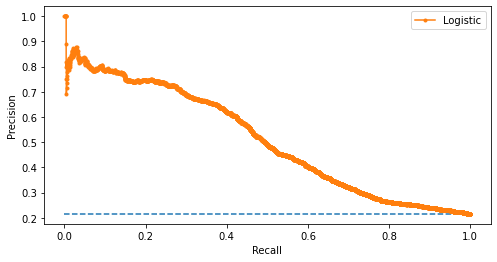

In [8]:
# mr_precision is the baseline precision determined by the proportion of positive

mr_precision = np.mean(y_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, p_pred)

# precision-recall curve may not be monotonic

plt.figure(figsize=(8,4))
plt.plot([0, 1], [mr_precision, mr_precision], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.', label = 'Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# PR AUC and AP score should be approximately the same

print("AUC for precision-recall curve:", auc(lr_recall, lr_precision))
print("AP score:", average_precision_score(y_test, p_pred))

# Under-sampling

In [ ]:
# Install the "imblearn package"
pip install -U imbalanced-learn

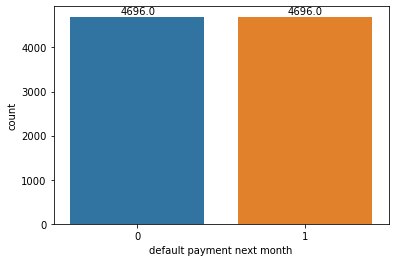

In [32]:
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 0)
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

ax = sns.countplot(x=y_train_under["default payment next month"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

# Over-sampling

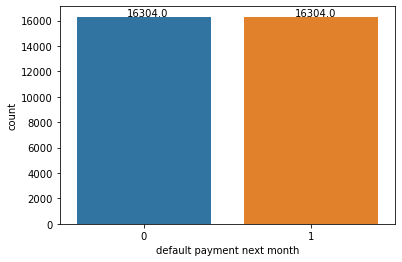

In [37]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority', random_state = 0)
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

ax = sns.countplot(x=y_train_over["default payment next month"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

# Cost-sensitive logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# solver='' specify the algorithm to be used for model estimation 

model = LogisticRegression(solver='newton-cg', max_iter=1000, class_weight='balanced')

# y_train.values.ravel() is to convert dataframe to array

lr = model.fit(x_train,y_train.values.ravel())
print(lr.coef_)
print(lr.intercept_)
print(lr.predict(x_test))
print(metrics.accuracy_score(y_test, lr.predict(x_test)))

In [107]:
y_pred = lr.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Recall:", tp/(tp+fn))
print("Precision:", tp/(tp+fp))
print("F1 Score:", f1_score(y_test, y_pred))

Recall: 0.6443298969072165
Precision: 0.37224538415723646
F1 Score: 0.4718761796904492
